# Programming for Data Science and Artificial Intelligence

## Unsupervised Learning - Clustering - GMM

### Readings:
- [VANDER] Ch5
- [HASTIE] Ch14.3
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
Name = "Muhammad Omer Farooq Bhatti"
Id = "st122498"

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

## Gaussian Mixture Models

Instead of simply assuming a spherical (circular) shape, we can generalize the Expectation-Maximization algorithm to "weighted sum" of gaussian distribution, we can create a more powerful model - essentially **Gaussian Mixture models**

Under the hood, a Gaussian mixture model is very similar to *k*-means: it uses an expectation–maximization approach which qualitatively does the following:

1. Choose starting guesses for the location and shape

2. Repeat until converged:

   1. *E-step*: for each point, find weights encoding the probability of membership in each cluster
   2. *M-step*: for each cluster, update its location, normalization, and shape based on *all* data points, making use of the weights

The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model.  Just as in the *k*-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

Mixture models can be used to describe a describution $p(x)$ by a convex combination of $K$ simple (base) distributions:

$$p(x) = \sum\limits_{k=1}^K \pi_k p_k(x)$$

$$ 0 \leq \pi_k \leq 1 $$

$$ \sum\limits_{k=1}^K \pi_k = 1 $$

where the components $p_k$ are members of a family of basic distributions, e.g., Gaussians, Bernoullis, or Gammas, and the $\pi_k$ are *mixture weights*.  Using these weights allow us to describe datasets with multiple "clusters".   

Here we shall focus on **Gaussian** mixture models (GMMs), where the basic distributions are Gaussians.  For a given dataset, we aim to maximize the likelihood of the model parammeters to train the GMM.

A *Gaussian mixture model* is a density model where we combine a finite number of $K$ Gaussian distributions $$ \mathcal{N} (x | \mu_k, \Sigma_k)$$ so that

$$p(x | \theta) = \sum\limits_{k=1}^K \pi_k \mathcal{N} (x | \mu_k, \Sigma_k)$$

$$0 \leq \pi_k \leq 1$$

$$\sum\limits_{k=1}^K \pi_k=1$$

where we define $\theta$ as

$$\theta := \{\mu_k, \Sigma_k, \pi_k: k = 1, \cdots, K\}$$

and $\mathcal{N}$ as the multivariate Gaussian distribution, computed using:

$$\mathcal{N} (x | \mu_k, \Sigma_k)= \frac{1}{(2\pi)^\frac{n}{2}\lvert{\Sigma_k}\rvert^\frac{1}{2}}\exp(-\frac{1}{2}(x -\mu_k)^T\Sigma_{k}^{-1}(x - \mu_k))$$

as the collection of all parameters of the model.  This convex combination of Gaussian distribution gives us significantly more flexibility for modeling complex densities than a simple Gaussian distribution.

**Learning**

Assume $X = \{x^{(i)}, \cdots, x^{(m)}\}$ are drawn form an unkown distribution $p(x)$.  Our objective is to find a good approximation of this unknown distribution by means of a GMM with $K$ mixture components.  We exploit our i.i.d (independently and identically distributed) assumption, which leads to the log-likelihood as

$$\log p(X | \theta) = \sum\limits_{i=1}^m \log p(x^{(i)} | \theta) = \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

Our objective function is to find $\theta$ that maximize the log-likehood $\mathcal{L}$

$$
\max_\theta \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

Our "normal" procedure would be to comute the gradient $\frac{d\mathcal{L}}{d\theta}$ of the log-likelihood with respect to the model parameters $\theta$, set it to 0, and solve for $\theta$, however, if you try this yourself at home, you will find that it is not possible to find the closed form.

One way we can do turns out to be the EM algorithm, where the key idea is to update one model parameter at a time, while keeping the others fixed.

Before we find the partial derivatives, let us introduce a quantity that will play a central role in this algorithm: **responsibilities**.

We define the quantity

$$ r^{(i)}_{k} = \frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}$$

as the *responsibility* of the $k$th mixture component for the $i$th data point.  

$r^{(i)}_{k}$ basically gives us $$ \frac{\text{Probability of $x^{(i)}$ belonging to cluster k}}{\text{Probability of $x^{(i)}$ over all clusters}} $$

The responsibility $r^{(i)}_{k}$ of the $k$th mixture component for data point $x^{(i)}$ is proportional to the likelihood of the mixture component given the data point.

$$p(x^{(i)} | \pi_k, \mu_k, \Sigma_k) = \pi_k\mathcal{N}(x^{(i)}|\mu_k, \Sigma_k)$$

Therefore, mixture components have a high responsibility for a data point when the data point could be a **plausible sample** from that mixture component.  Note that 

$$r^{(i)} = r^{(i)}_1, r^{(i)}_2, \cdots, r^{(i)}_k \in \mathbb{R}^k$$

is a normalized probability vector, i.e., for each sample $i$

$$\sum\limits_{j=1}^{k}r^{(i)}_j = 1$$

$$ r^{(i)}_j \geq 0 $$

Thus this probability vector distributes probability mass among the $K$ mixture components, and we can think of $r^{(ik)}$ as probability that $x^{(i)}$ has been generated by the $k$th mixture component.

By summing all the total responsibility of the $k$th mixture component along all samples, we get $N_k$.

$$N_k = \sum\limits_{i=1}^{m}r^{(i)}_k$$

Note that this value does not necessarily equal to 1.

**Updating the mean**

The update of the mean parameters $\mu_k, k=1,\cdots,K$ of the GMM is given by:

$$ \mu_k^{new} = \frac{\sum\limits_{i=1}^{m}r^{(i)}_{k}x^{(i)}}{\sum\limits_{i=1}^{m}r^{(i)}_{k}}$$

To prove this:

Any local optimum of a function exhibits the property that its gradient with respect to the parameters must vanish, i.e., setting its partial derivative to zero.

We take a partial derivative of our objective function with respect to the mean parameters $\mu_k, k=1, \cdots, K$.  To simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(x^{(i)} | \theta)}{\partial \mu_k} = \sum\limits_{j=1}^K \pi_j \frac{\partial \mathcal{N}(x^{(i)} | \mu_j, \Sigma_j)}{\partial \mu_k} = \pi_k \frac{\partial \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)}{\partial \mu_k} = \pi_k(x^{(i)} - \mu_k)^T \Sigma_k^{-1}\mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)
$$

Now, taking all samples and log, since we know the partial derivative of $\log$ something is $\frac{1}{x}$, thus

$$
\frac{\partial \mathcal{L}}{\partial \mu_k} =\sum\limits_{i=1}^{m} \frac{\partial \log p(x^{(i)} | \theta)}{\partial \mu_k} = \sum\limits_{i=1}^{m} \frac{1}{p(x^{(i)} | \theta)} \frac{\partial p(x^{(i)} | \theta) }{\partial \mu_k} = \sum\limits_{i=1}^{m}(x^{(i)} - \mu_k)^T \Sigma_k^{-1}\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}
$$

To simplify, we can substitute $r^{(i)}_{k}$ into the equation, thus

$$= \sum\limits_{i=1}^{m} r^{(i)}_{k}(x^{(i)} - \mu_k)^T\Sigma_k^{-1}$$

We can now solve for $\mu_k$ so that $\frac{\partial \mathcal{L}}{\partial \mu_k} = 0$ and obtain

$$\sum\limits_{i=1}^{m} r^{(i)}_{k}(x^{(i)} - \mu_k)^T\Sigma_k^{-1} = 0$$

Multiply both sides by $\Sigma$ will cancel out the inverse $\Sigma$, and move $\mu_k$ to another side

$$\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)}  = \sum\limits_{i=1}^{m} r^{(i)}_{k}\mu_k$$

$$\frac{\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)} }{\sum\limits_{i=1}^{m} r^{(i)}_{k}}  = \mu_k$$

We can further substitute $N_k$ so that

$$
\frac{1}{N_k}\sum\limits_{i=1}^{m} r^{(i)}_{k}x^{(i)} = \mu_k
$$

Here we can interpret that $\mu_k$ is pulled toward a data point $x^{(i)}$ with strength given by $r^{(i)}_{k}$.  The means are pulled stronger toward data points for which the corresponding mixture component has a high responsibility, i.e., a high likelihood.

**Updating the covariances**

The update of the covariance parameters $\Sigma_k, k=1,\cdots,K$ of the GMM is given by:

$$ \Sigma_k^{new} = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T $$

To prove this:

We take a partial derivative of our objective function with respect to the Sigma parameters $\Sigma_k, k=1, \cdots, K$.  Similarly, to simplify things, let's perform partial derivative without the log first and only consider one sample.

$$
	\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k} = \frac{\partial}{\partial \Sigma_k} \big(\pi_k(2\pi)^{-\frac{D}{2}} \det(\Sigma_k)^{\frac{1}{2}}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)\big)\big)
$$

Using derivative multiplication rule, we got

$$
= \pi_k(2\pi)^{-\frac{D}{2}}\big[\frac{\partial}{\partial \Sigma_k}\det(\Sigma_k)^{-\frac{1}{2}}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)) + \det(\Sigma_k)^{-\frac{1}{2}}\frac{\partial}{\partial \Sigma_k}exp\big(-\frac{1}{2}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k)\big]
$$

Using this following rule

$$
\frac{\partial}{\partial X}\det(f(x)) = \det(f(x))tr\big(f(x)^{-1}\frac{\partial f(x)}{\partial x}\big)
$$

We get that

$$
\frac{\partial}{\partial \Sigma_k}\det(\Sigma_k)^{-\frac{1}{2}} = -\frac{1}{2}\det(\Sigma_k)^{-\frac{1}{2}}\Sigma_k^{-1}
$$

Using this following rule

$$
\frac{\partial a^TXb}{\partial X} = ab^T
$$

We get that

$$
\frac{\partial}{\partial \Sigma_k}(x^{(i)} - \mu_k)^T\Sigma^{-1}_k(x^{(i)} - \mu_k) = -\Sigma_k^{-1}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1}
$$

Putting them together, we got:

$$
\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k} = \pi_k\mathcal{N}(x^{(i)} | \mu_k, \Sigma_k) * \big[-\frac{1}{2}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1}\big]
$$

Now consider all samples and log as well, the partial derivative of the log-likelihood with respect to $\Sigma_k$ is given by

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \Sigma_k} &=  \sum\limits_{i=1}^{m}\frac{\partial \log p(x^{(i)} | \theta)}{\partial \Sigma_k}\\
&=\sum\limits_{i=1}^{m}\frac{1}{(p(x^{(i)} | \theta)}\frac{\partial p(x^{(i)} | \theta)}{\partial \Sigma_k}\\
&=\sum\limits_{i=1}^{m}\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} * \big[-\frac{1}{2}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1})\big]
\end{aligned}
$$

Substituting $r^{(i)}_{k}$, we got

$$
= -\frac{1}{2}\sum\limits_{i=1}^{m}r^{(i)}_{k}(\Sigma_k^{-1}-\Sigma_k^{-1}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\Sigma_k^{-1})\\
= -\frac{1}{2}\Sigma_k^{-1}\sum\limits_{i=1}^{m}r^{(i)}_{k} + \frac{1}{2}\Sigma_k^{-1}\big(\sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\big)\Sigma_k^{-1}
$$

Setting this to zero, we obtain:

$$
N_k\Sigma_k^{-1} = \Sigma_k^{-1}\big(\sum\limits_{i=1}^m r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T\big)\Sigma_k^{-1}
$$

By solving for $\Sigma_k$ we got

$$
\Sigma_k = \frac{1}{N_k}\sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)}-\mu_k)(x^{(i)} - \mu_k)^T
$$

**Updating the pi - weight of mixture components**

The update of the mixture weights $\pi_k, k=1,\cdots,K$ of the GMM is given by:

$$ \pi_k^{new} = \frac{N_k}{m}$$

To prove this:

To find the partial derivative, we account for the equality constraint 

$$\sum\limits_{k=1}^K \pi_k=1$$

The Lagrangian $\mathscr{L}$ is

$$
\begin{aligned}
\mathscr{L} &= \mathcal{L} + \beta\big(\sum\limits_{k=1}^K \pi_k-1\big)\\
&= \sum\limits_{i=1}^m \log \sum\limits_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k) + \beta\big(\sum\limits_{k=1}^K \pi_k-1\big)
\end{aligned}
$$

Taking the partial derivative with respect to $\pi_k$ as

$$
\begin{aligned}
\frac{\partial \mathscr{L}}{\partial \pi_k} &= \sum\limits_{i=1}^m
\frac{\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} + \beta \\
&= \frac{1}{\pi_k}\sum\limits_{i=1}^m\frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)} + \beta\\
&= \frac{N_k}{\pi_k} + \beta
\end{aligned}
$$

Taking the partial derivative with respect to $\beta$ is

$$
\frac{\partial \mathscr{L}}{\partial \beta} = \sum\limits_{i=1}^{K} \pi_k - 1
$$

Setting both partial derivatives to zero yield

$$
\pi_k = -\frac{N_k}{\beta}
$$

$$
1 = \sum\limits_{i=1}^K\pi_k
$$

Using the top formula to solve for the bottom formula:

$$    
- \sum\limits_{i=1}^{m}\frac{N_k}{\beta} = 1\\
= -\frac{m}{\beta} = 1\\
= \beta = -m
$$

Substitute $-m$ for $\beta$ yield

$$
\pi_k = \frac{N_k}{m}
$$

**Algorithm**

Thus, we can summarize the whole algorithm into the following steps:

1. Define $k$ number of clusters $c$
2. For each cluster k, randomly initialize parameters mean $\mu_k$, covariance $\Sigma_k$, and fraction per class $\pi_k$ 

3. *E-step:*  Evaluate responsibilities $r^{(i)}_{k}$ for every data point $x^{(i)}$ using 

$$ r^{(i)}_{k} = \frac{\pi_k\mathcal{N}(x^{(i)} \mid \mu_k, \Sigma_{k})}{\Sigma_{j=1}^{K} \pi_j\mathcal{N}(x^{(i)} \mid \mu_j, \Sigma_j)}$$

4. *M-step:*  Restimate parameters $\pi_k, \mu_k, \Sigma_k$ using the current responsibilites $r^{(i)}_{k}$ from the E step.

$$ \mu_k = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}x^{(i)}$$

$$ \Sigma{_k} = \frac{1}{N_k} \sum\limits_{i=1}^{m}r^{(i)}_{k}(x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T$$

$$ \pi_k = \frac{N_k}{m}$$

**Coding considerations**

1.  To ease our programming efforts, we can use <code>scipy.stats.multivariate_normal</code> for generating gaussian distribution, and using its <code>.pdf()</code> function to compute the values we want of $N(x_i \mid \mu_k, \Sigma_k)$

2. Shape of $r$ which keeps probability of $x^{(i)}$ belonging to $k$th cluster is $(m * k)$, where m is <code>X.shape[0]</code> and $k$ is number of clusters we want.  

3. Shape of $\Sigma$ or covariance of each cluster is simply $(n * n)$ where n is number of features or <code>X.shape[1]</code>. If we define 3 clusters, then we will have [$\Sigma_1$, $\Sigma_2$, $\Sigma_3$], each with shape $(n * n)$, thus whole thing is shape $ (k * n * n) $

4. Shape of $\pi$ is simply $(k, )$
    
5. Shape of $\mu$ is $(n, k)$, defining mean for each feature for $k$th cluster

6. What to initialize can be tricky.  For $r$ and $\pi$, you can fill with $1/k$.  As for $\mu$, it is easiest to simply pick random points from the samples as initial means.  Last, for covariance ($\Sigma$), we can simply use the covariance of the $X$ as initialization (i.e., <code>np.cov(X.T)</code>)


### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it performs early stopping when the log likelihood does not improve anymore.
- Perform plotting every 5 iterations on the resulting clusters.

In [10]:
class GMM:
    def __init__(self, n_cluster = 4, max_iter = 100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.responsibility=[]  #<-- responsibilities = likelihoods/conditional probability P(x|zi=k)
                                #for x given cluster = k, for each cluster
        self.pi=[]              #pi = P(zi=k), Prior Probability of x belonging to a cluster k, for each cluster 
        self.mean=[]
        self.covariance=[]      #<-- Covariance of each cluster
        
    def fit(self, X, plot=False):
        
        #responsibilities = likelihoods/conditional probability P(x|zi=k) for x given cluster = k, for each cluster
        #pi = P(zi=k), Prior Probability of x belonging to a cluster k, for each cluster 
        #We initialize responsibilities and pi as 1/(number of clusters)
        self.responsibility = np.full((X.shape[0], self.n_cluster), fill_value=(1/self.n_cluster))
        self.pi = np.full((self.n_cluster), fill_value=(1/self.n_cluster))
        
        #We choose random points from training samples to initialize mean
        random_mean_idx = np.random.randint(low=0, high=X.shape[0], size = self.n_cluster)
        self.mean = np.array(X[random_mean_idx]).T     #define mean as shape (n,k)
        
        
        #We initialize covariance of X as covariance for n_cluster
        self.covariance = []                                     #
        for i in range(self.n_cluster):                          #
            self.covariance.append(np.cov(X.T))                  #
        self.covariance = np.array(self.covariance)              #
        #print("Cov: ", self.covariance.shape)                   #
        
        old_loglikelihood = np.inf
        
        for iteration in range(self.max_iter):
            
            #===Expectation Step=====
            
            #Update responsibilities of each sample
            self.responsibility = self.calc_responsibilities(X)
            
            #Calculate log(likelihood) from Conditional Probability and Pi
            loglikelihood = self.calc_loglikelihood()
            #Implement early stopping
            if math.fabs(old_loglikelihood - loglikelihood) < 0.1:  #<-- calculates and compares absolute value in float
                print(f"Final log_likelihood: {loglikelihood}, iteration: {iteration}")
                break
            else:
                old_loglikelihood = loglikelihood
            
            #===Visualization Step====
            if (iteration%5 == 0) and (plot==True):
                y_hat = self.responsibility.argmax(axis=1)
                plt.figure()
                plt.scatter( X[:,0], X[:,1], c=y_hat )
                plt.title(f"GMM at Iteration #{iteration}")
            
            #===Maximization Steps====
            
            # Find NK first for latter use
            NK = np.sum(self.responsibility, axis=0)   #Sum responsibilities of all samples for each cluster
            assert NK.shape == (self.n_cluster, )      #NK = Total responsibility of each cluster, k

            #Update Pi
            self.pi = NK / X.shape[0]
            assert self.pi.shape == (self.n_cluster, )
            
            #Update mean of each cluster
            self.mean =  ( X.T @ self.responsibility ) / NK
            assert self.mean.shape == (X.shape[1], self.n_cluster)

            #Update covariance (also called Sigma)
            self.covariance = np.zeros((self.n_cluster, X.shape[1], X.shape[1]))
            for cluster in range(self.n_cluster):
                for i in range(X.shape[0]):
                    Xi_minus_mean = (X[i] - self.mean[:, cluster]).reshape(-1, 1)
                    self.covariance[cluster] += self.responsibility[i, cluster] * (Xi_minus_mean @ Xi_minus_mean.T)
                self.covariance[cluster] /= NK[cluster]
            assert self.covariance.shape == (self.n_cluster, X.shape[1], X.shape[1])
        
    def calc_responsibilities(self, X):
        responsibility = np.zeros((X.shape[0], self.n_cluster))
        for i in range(X.shape[0]):
            for cluster in range(self.n_cluster):
                #Generate conditional probability of X[i] from Probability Density Function with given parameters
                xi_pdf = multivariate_normal.pdf(X[i], mean=self.mean[:, cluster], cov=self.covariance[cluster])
                responsibility[i, cluster] = self.pi[cluster] * xi_pdf
            #Divide responsibility for each k by sum of responsibility of all k
            responsibility[i] /= np.sum(responsibility[i])
        return responsibility

    def calc_loglikelihood(self):
        loglikelihood=0
        for i in range(X.shape[0]):
            for cluster in range(self.n_cluster):
                #Generate log conditional probability of X[i] from Probability Density Function with given parameters
                xi_logpdf = multivariate_normal.logpdf(X[i], mean=self.mean[:, cluster], cov=self.covariance[cluster])
                loglikelihood += (math.log(self.pi[cluster]) + xi_logpdf)
        return loglikelihood
        
    def predict(self, _X):
        responsibility = self.calc_responsibilities(_X)
        yhat = responsibility.argmax(axis=1)
        return yhat

Final log_likelihood: -376125.36465151823, iteration: 18


Text(0.5, 1.0, 'Actual')

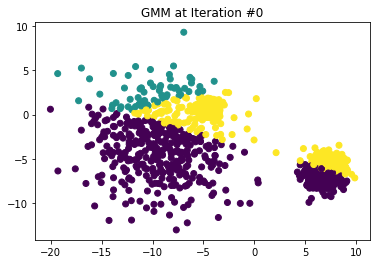

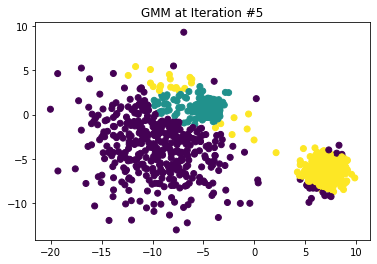

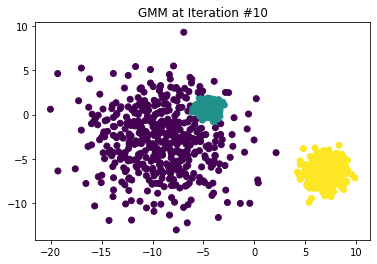

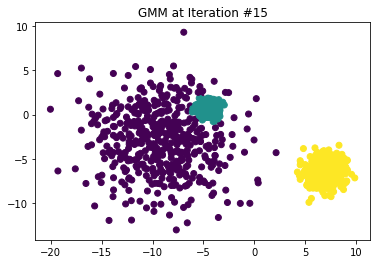

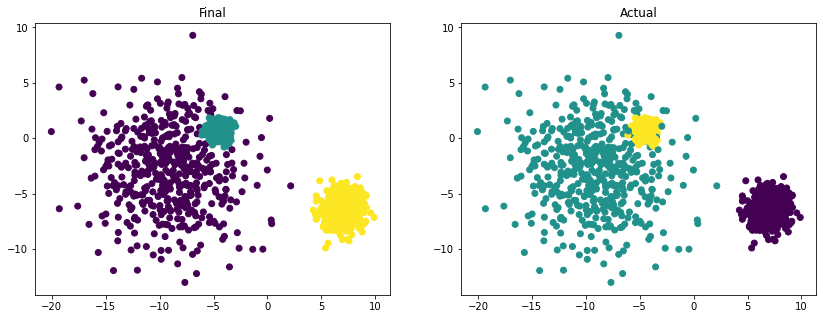

In [11]:
X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=15)

model = GMM(n_cluster=3)
model.fit(X, plot=True)
yhat = model.predict(X)

#plot
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].scatter(X[:, 0], X[:, 1], c=yhat)
ax[0].set_title("Final")
ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_title("Actual")